# Project - Unsupervised Learning

#### Import the necessary libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string)) 
    
# Note : Using printmd function to print text in bold format.

## 1. Read the dataset and understand the features and target variable. 2 points

In [3]:
# Read the dataset
colnames=['Industrial_Risk','Management_Risk','Financial_Flexibility','Credibility','Competitiveness','Operating_Risk','Class']
df=pd.read_csv('Qualitative_Bankruptcy.data.txt', names=colnames, header=None)

In [4]:
df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [5]:
printmd("**Shape of the data.**")
print(df.shape)
print("Number of Rows = {0}\nNumber of Columns = {1}".format(df.shape[0],df.shape[1]))

**Shape of the data.**

(250, 7)
Number of Rows = 250
Number of Columns = 7


In [6]:
printmd("**Data type of each attribute.**")
df.dtypes

**Data type of each attribute.**

Industrial_Risk          object
Management_Risk          object
Financial_Flexibility    object
Credibility              object
Competitiveness          object
Operating_Risk           object
Class                    object
dtype: object

In [7]:
printmd("**Unique values in each attribute.**")
# df.nunique()
for i in df.columns :
    print('%s : '%(i),df[i].unique())

**Unique values in each attribute.**

Industrial_Risk :  ['P' 'N' 'A']
Management_Risk :  ['P' 'N' 'A']
Financial_Flexibility :  ['A' 'P' 'N']
Credibility :  ['A' 'P' 'N']
Competitiveness :  ['A' 'P' 'N']
Operating_Risk :  ['P' 'N' 'A']
Class :  ['NB' 'B']


In [8]:
printmd("**Checking the presence of missing values.**")
df.isnull().sum()

**Checking the presence of missing values.**

Industrial_Risk          0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitiveness          0
Operating_Risk           0
Class                    0
dtype: int64

In [9]:
printmd("**Number of NaN values :**")
df.isna().sum()

**Number of NaN values :**

Industrial_Risk          0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitiveness          0
Operating_Risk           0
Class                    0
dtype: int64

### Understanding of each attribute or feature in the given data
* There are **250** records with **7** attributes/features.
* There are no missing values
* Independent variables are categorical in nature.
* Target variable is a binary categorical variable.
* We shall Encode/assign numeric values to the categorical columns to facilitate further analysis and model building 

## 2. Encode independent features.

In [10]:
df_enc=df.copy() # make a copy of data frame

In [11]:
df_enc.replace(to_replace=['N', 'A', 'P','NB','B'],value=[0,1,2,0,1],inplace=True) # replace command for assignment

In [12]:
df_enc.head() # check data for reassignment

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,2,2,1,1,1,2,0
1,0,0,1,1,1,0,0
2,1,1,1,1,1,1,0
3,2,2,2,2,2,2,0
4,0,0,2,2,2,0,0


In [13]:
df_enc.info() # check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial_Risk          250 non-null int64
Management_Risk          250 non-null int64
Financial_Flexibility    250 non-null int64
Credibility              250 non-null int64
Competitiveness          250 non-null int64
Operating_Risk           250 non-null int64
Class                    250 non-null int64
dtypes: int64(7)
memory usage: 13.8 KB


## 3. Separate the dependant variable from the rest of the train data

In [14]:
X=df_enc.drop('Class',axis=1) # seperate X
y=df_enc['Class'] # seperate y

In [15]:
X.head() # check for seperation

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
0,2,2,1,1,1,2
1,0,0,1,1,1,0
2,1,1,1,1,1,1
3,2,2,2,2,2,2
4,0,0,2,2,2,0


In [16]:
y.head() # check for seperation

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## 4. Split the dataset into training and test data ( Take 80:20 ratio).

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0) # split in 80:20 ratio

C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 5. Apply PCA on the independent features of train data.

In [19]:
from sklearn.decomposition import PCA  # import library and applicable class

In [20]:
pca=PCA() # initialize PCA

In [21]:
pca.fit(X_train) # fit PCA on Train data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance).

In [22]:
pca.explained_variance_ # variance explained

array([1.85228817, 0.77040676, 0.63844036, 0.52190201, 0.26041376,
       0.17225247])

In [23]:
pca.explained_variance_.sum() #Total variance explained

4.215703517587937

In [24]:
(pca.explained_variance_/pca.explained_variance_.sum()*100) # PCA expained in percentage

array([43.9378187 , 18.2746902 , 15.14433718, 12.37995042,  6.1772313 ,
        4.08597219])

In [25]:
var_cum=np.zeros(X_train.columns.size) # array to hold cumulaite variance

In [26]:
var_cum=np.zeros(X_train.columns.size)
for i,v in enumerate(pca.explained_variance_/pca.explained_variance_.sum()*100):
    if i==0:
        var_cum[i]=v
    else:
        var_cum[i]=v+var_cum[i-1]
       

In [27]:
var_cum # check the cumulative array 

array([ 43.9378187 ,  62.21250891,  77.35684609,  89.73679651,
        95.91402781, 100.        ])

Text(0.5, 1.0, 'Elbow plot for Variance explained')

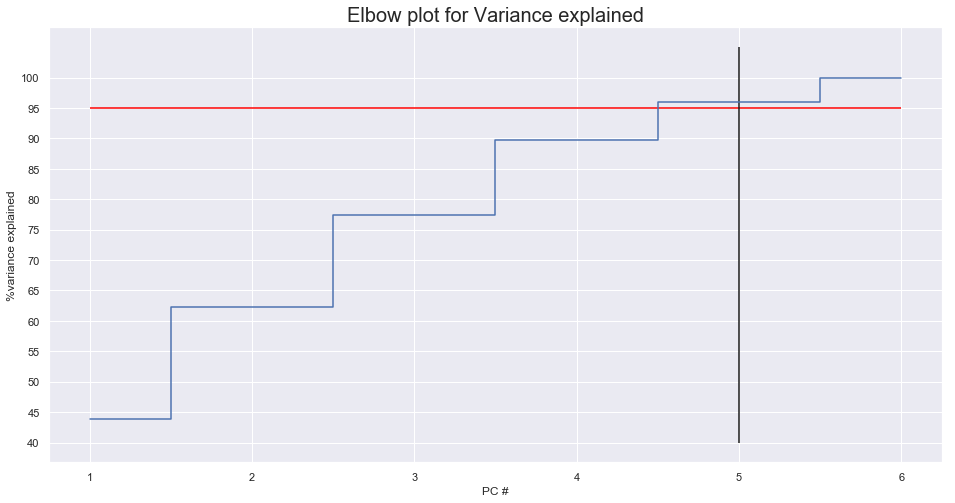

In [28]:
sns.set()
plt.figure(figsize=(16,8))
plt.step(x=np.arange(1,var_cum.size+1),y=var_cum, where= 'mid')
plt.yticks(np.arange(40,105,5))
plt.hlines(95,xmin=1,xmax=6,colors='red')
plt.vlines(5,ymin=40,ymax=105)
plt.xlabel('PC #')
plt.ylabel('%variance explained')
plt.title('Elbow plot for Variance explained',fontsize=20)

#### First 5 components explained the 95% of the variance

## 7. Transform the data using PCA ( select optimum number of PCs).

In [29]:
pca=PCA(n_components=5) # reinitialize PCA with 5 components

In [30]:
X_tf_train=pca.fit_transform(X_train) # fit and trasnforom PCA on train set

In [31]:
X_tf_train[0:5]

array([[ 2.1603652 , -1.13352522, -0.10963994,  0.2475714 , -0.50490224],
       [-0.97415828, -1.58961191,  0.32633825,  0.10899573,  0.36383837],
       [-2.02364751,  0.5975525 ,  0.20783822,  0.07229091,  0.07372216],
       [ 1.67582199,  0.37394401, -1.15850772,  0.76533878, -0.84775318],
       [ 1.25439981,  1.31117934,  1.17698475, -0.81170665,  0.14606006]])

In [32]:
X_train_5D=pd.DataFrame(X_tf_train,columns=['pc1','pc2','pc3','pc4','pc5']) # data frame with trasnformed features

In [33]:
X_train_5D=pd.DataFrame(X_tf_train,columns=['pc1','pc2','pc3','pc4','pc5']) # data frame with trasnformed features

###### Based on the pair plot it can be infered that there can be 2-3 clusters

Text(0.5, 1.0, 'Corelation plot ')

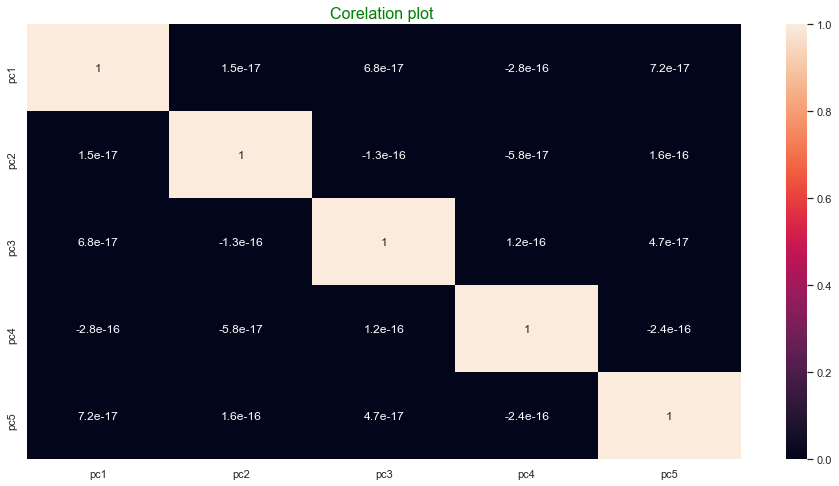

In [34]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train_5D.corr(),annot=True)
plt.title('Corelation plot ',fontsize=16,color='green')

##### No correlation between transformed dependent variables after PCA as expected.

## 8&9) Apply K means clustering,select optimal number of cluster and form cluster¶

In [35]:
from sklearn.cluster import KMeans # import relevant libraries

In [36]:
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
labels=[]
centroids=[]
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_train_5D)
  labels.append(clusters.labels_)                    # capture the cluster lables
  centroids.append(clusters.cluster_centers_)        # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:5]

,num_clusters,cluster_errors
0,1,804.646758
1,2,491.898339
2,3,399.311715
3,4,348.648431
4,5,310.863030


Text(0.5, 1.0, 'Elbow plot')

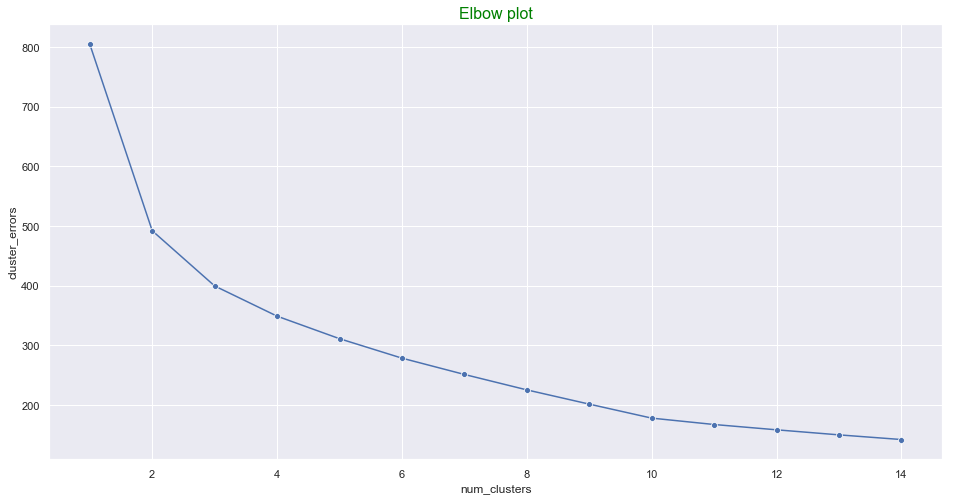

In [37]:
# plot inertias vs number of clusters
plt.figure(figsize=(16,8))
sns.lineplot(x='num_clusters',y='cluster_errors',data=clusters_df,marker='o')
plt.title('Elbow plot',fontsize=16,color='green')

##### 2-3 cluster seams optimal, let us verify with other means based on silhouette score and agglomerative clustering

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.35211285610412446


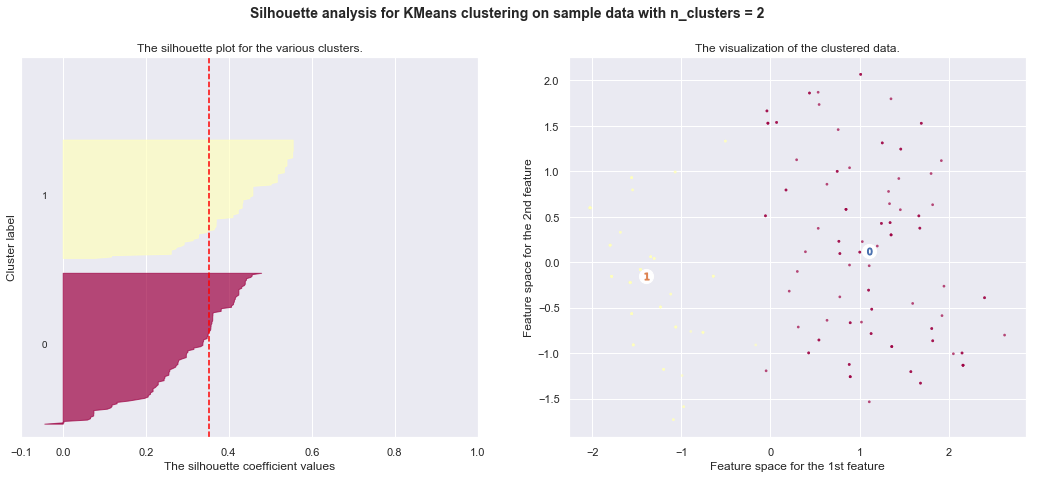

For n_clusters = 3 The average silhouette_score is : 0.3157368127356212


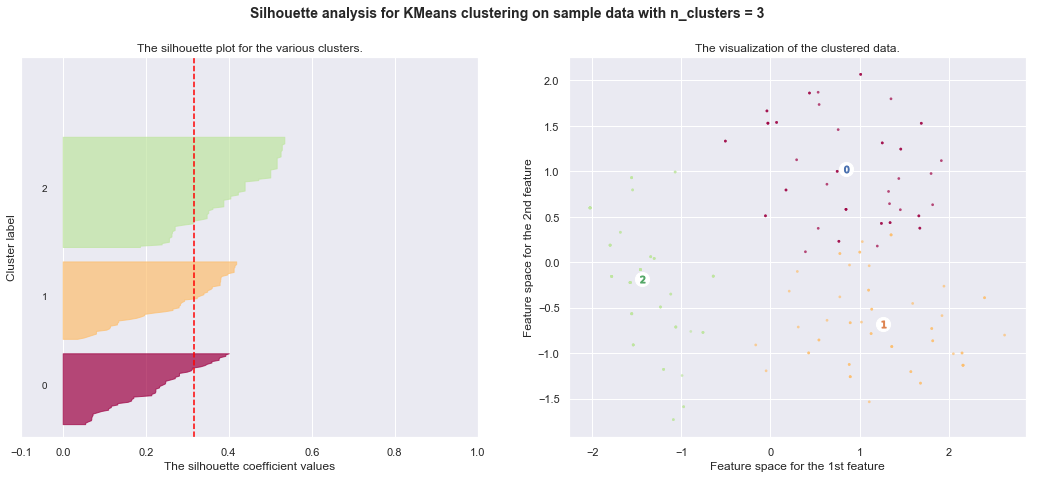

For n_clusters = 4 The average silhouette_score is : 0.26883660663850806


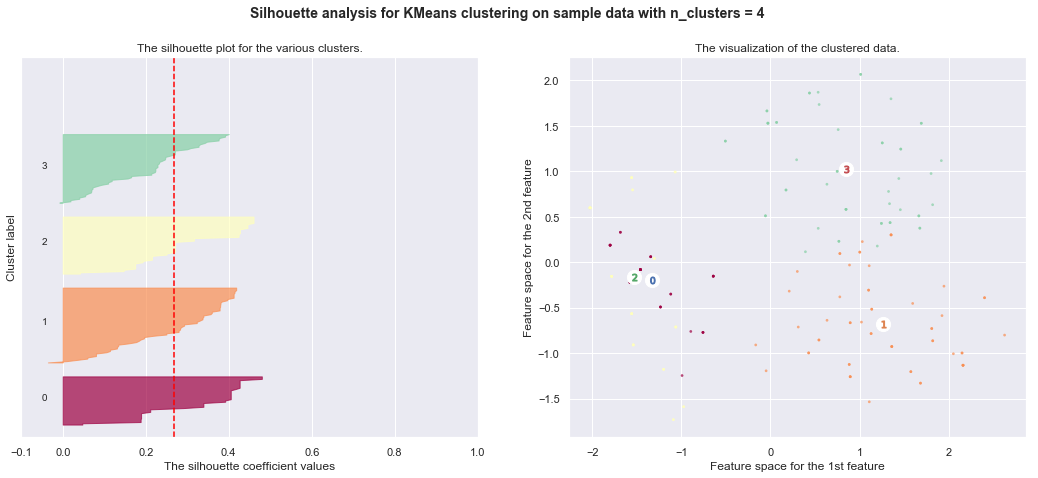

For n_clusters = 5 The average silhouette_score is : 0.27154784434487367


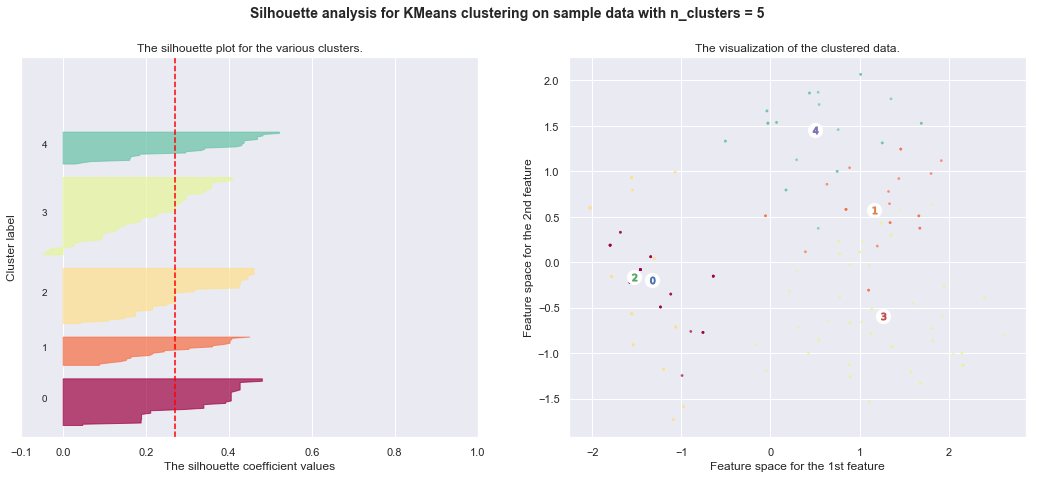

For n_clusters = 6 The average silhouette_score is : 0.2858375070734644


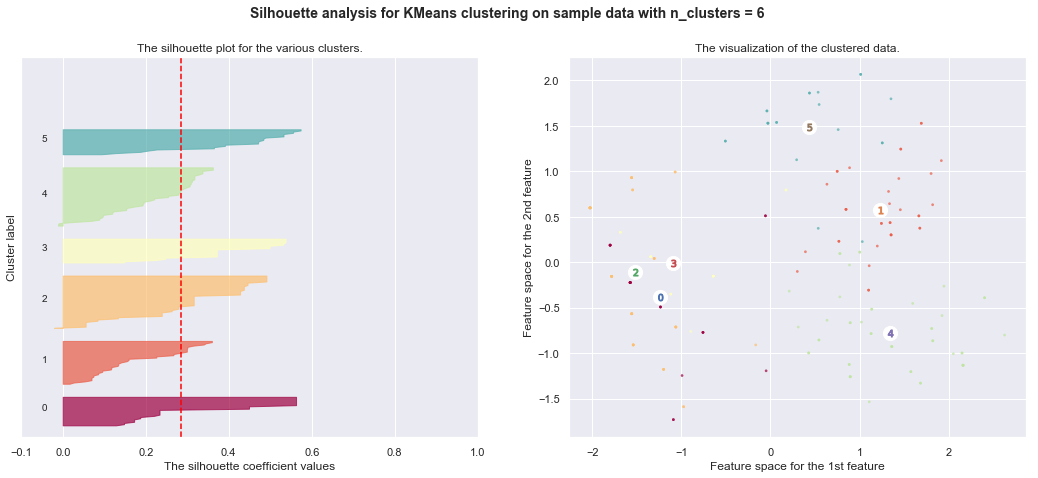

For n_clusters = 7 The average silhouette_score is : 0.281724913277946


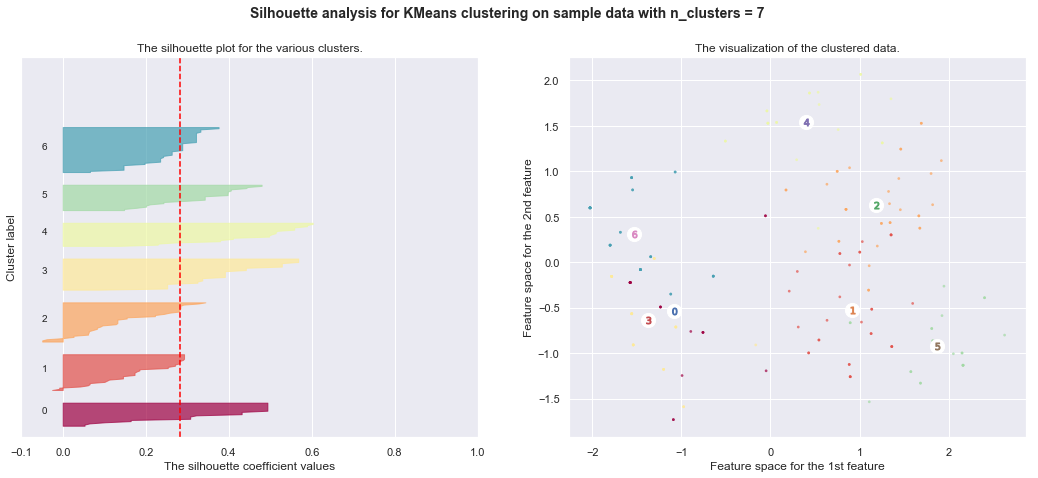

For n_clusters = 8 The average silhouette_score is : 0.2996098186244843


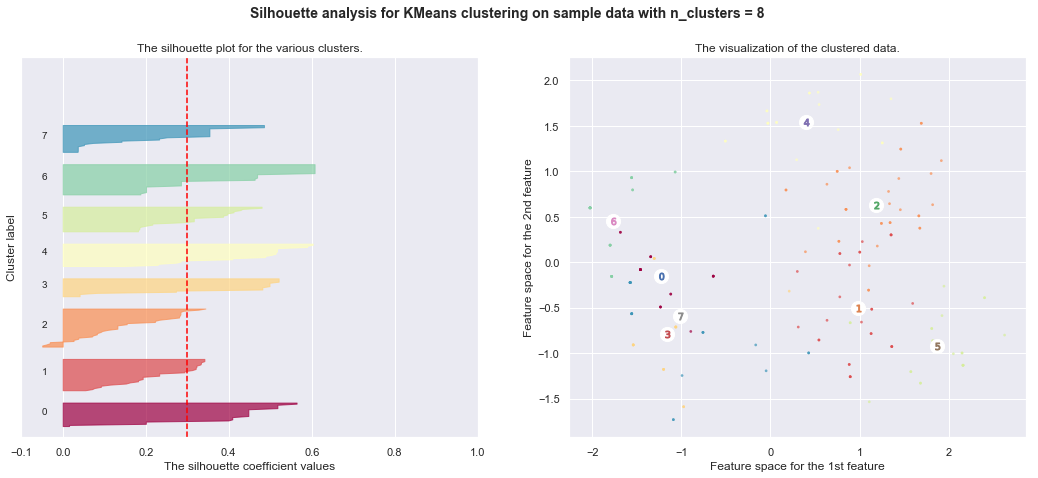

For n_clusters = 9 The average silhouette_score is : 0.30973406420164307


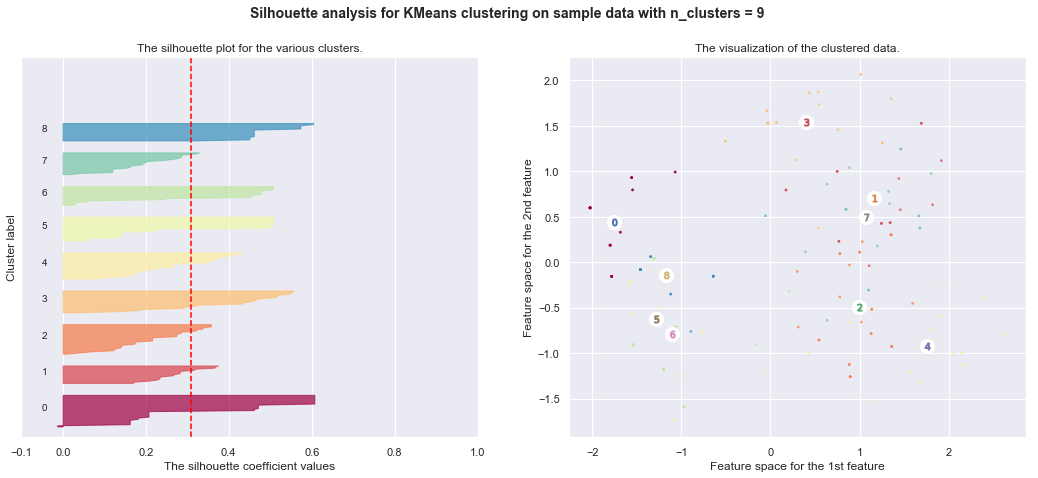

For n_clusters = 10 The average silhouette_score is : 0.3349289651393325


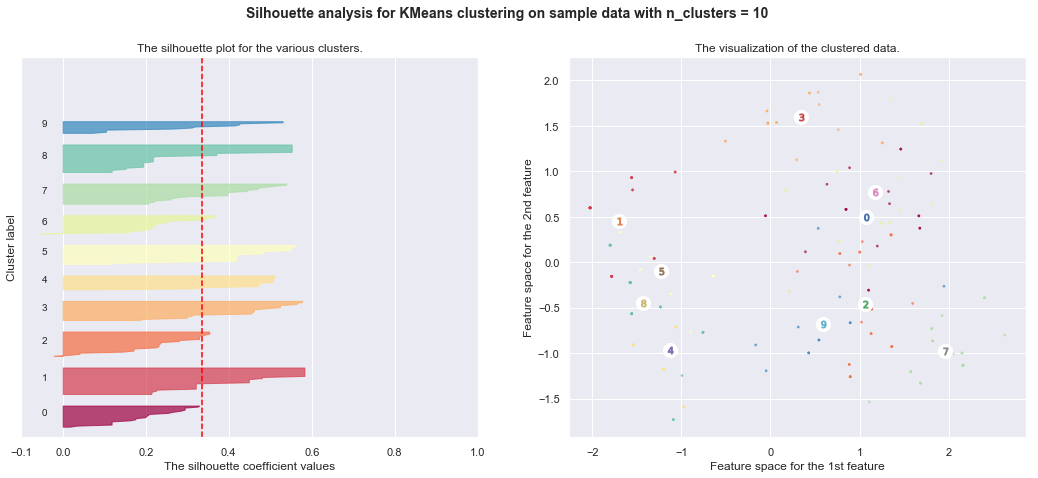

For n_clusters = 11 The average silhouette_score is : 0.3442789117370132


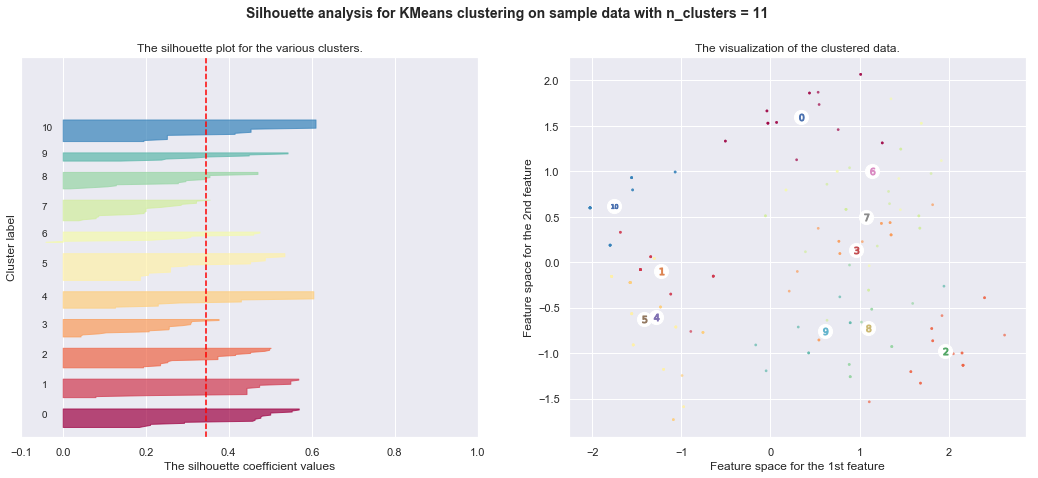

For n_clusters = 12 The average silhouette_score is : 0.3415340172103509


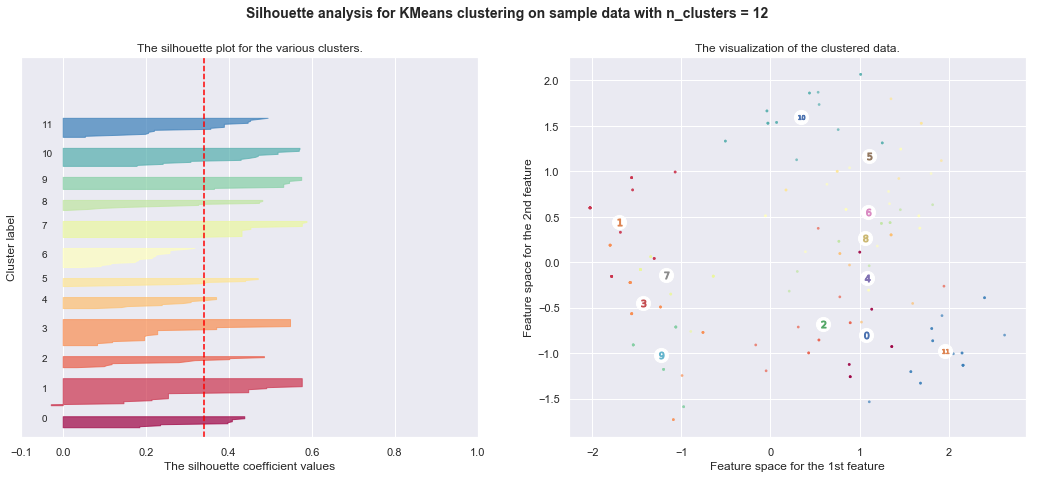

For n_clusters = 13 The average silhouette_score is : 0.3412693831610941


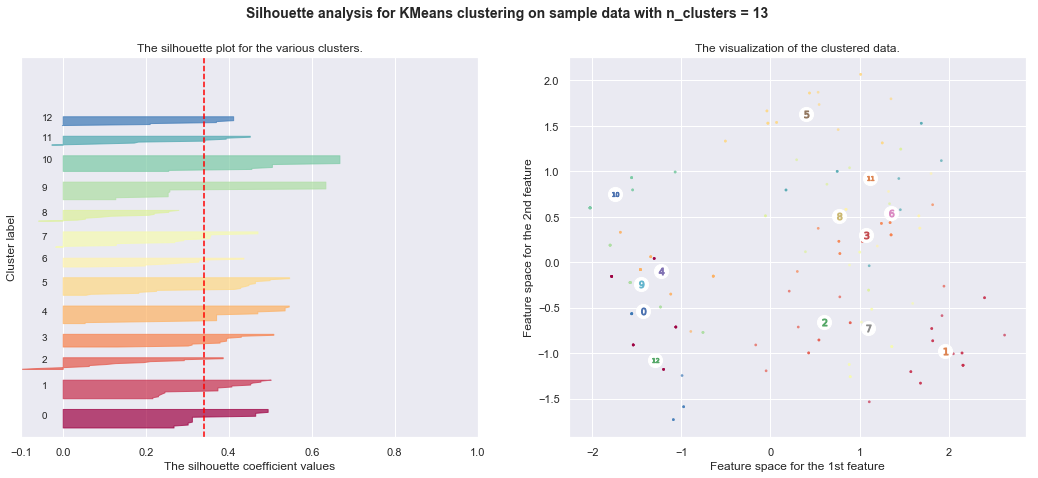

For n_clusters = 14 The average silhouette_score is : 0.35213751380653463


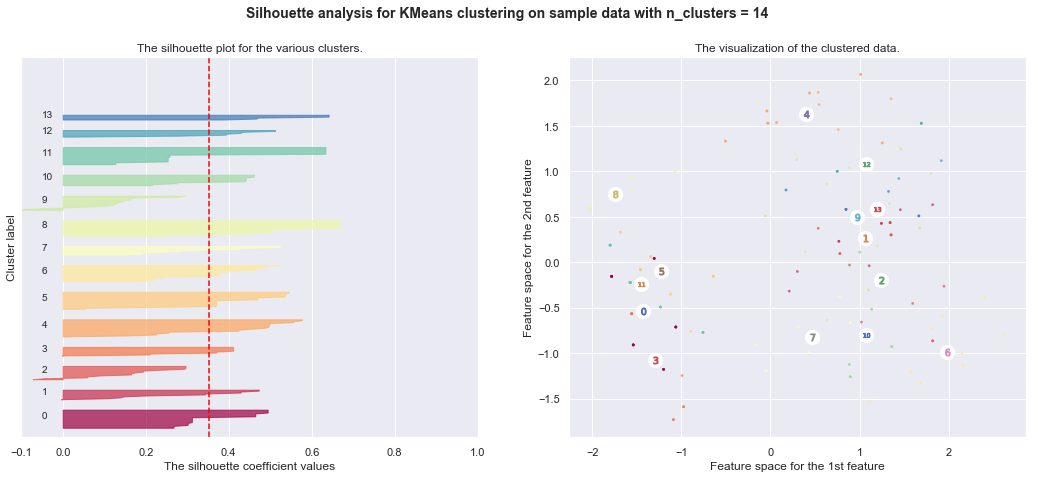

For n_clusters = 15 The average silhouette_score is : 0.33277993146082274


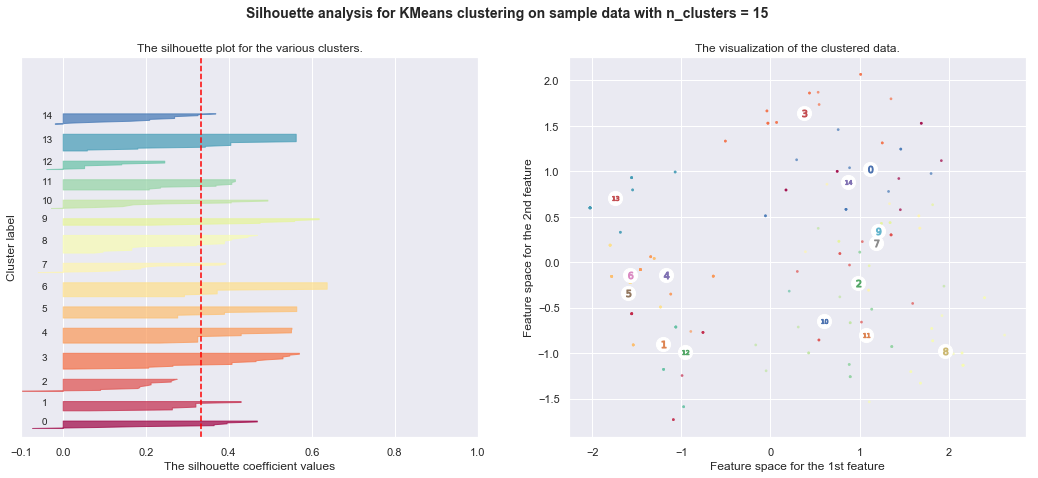

For n_clusters = 16 The average silhouette_score is : 0.33469683653584636


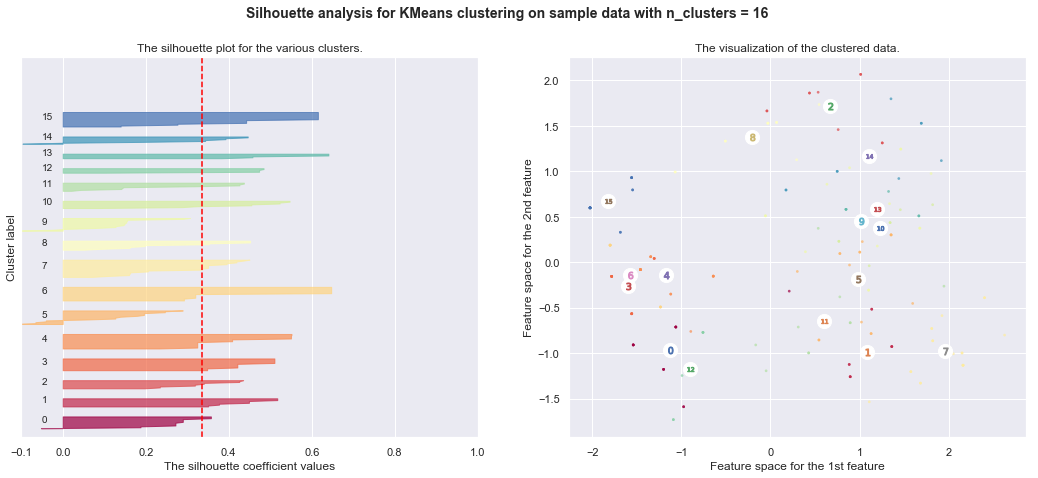

In [38]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X_train_5D)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_5D, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_5D, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_5D['pc1'], X_train_5D['pc2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

##### 2 clusters are the most ideal cluster based on the silhouette score

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
cl_ag=AgglomerativeClustering()

In [41]:
cl_ag.fit(X_train_5D)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

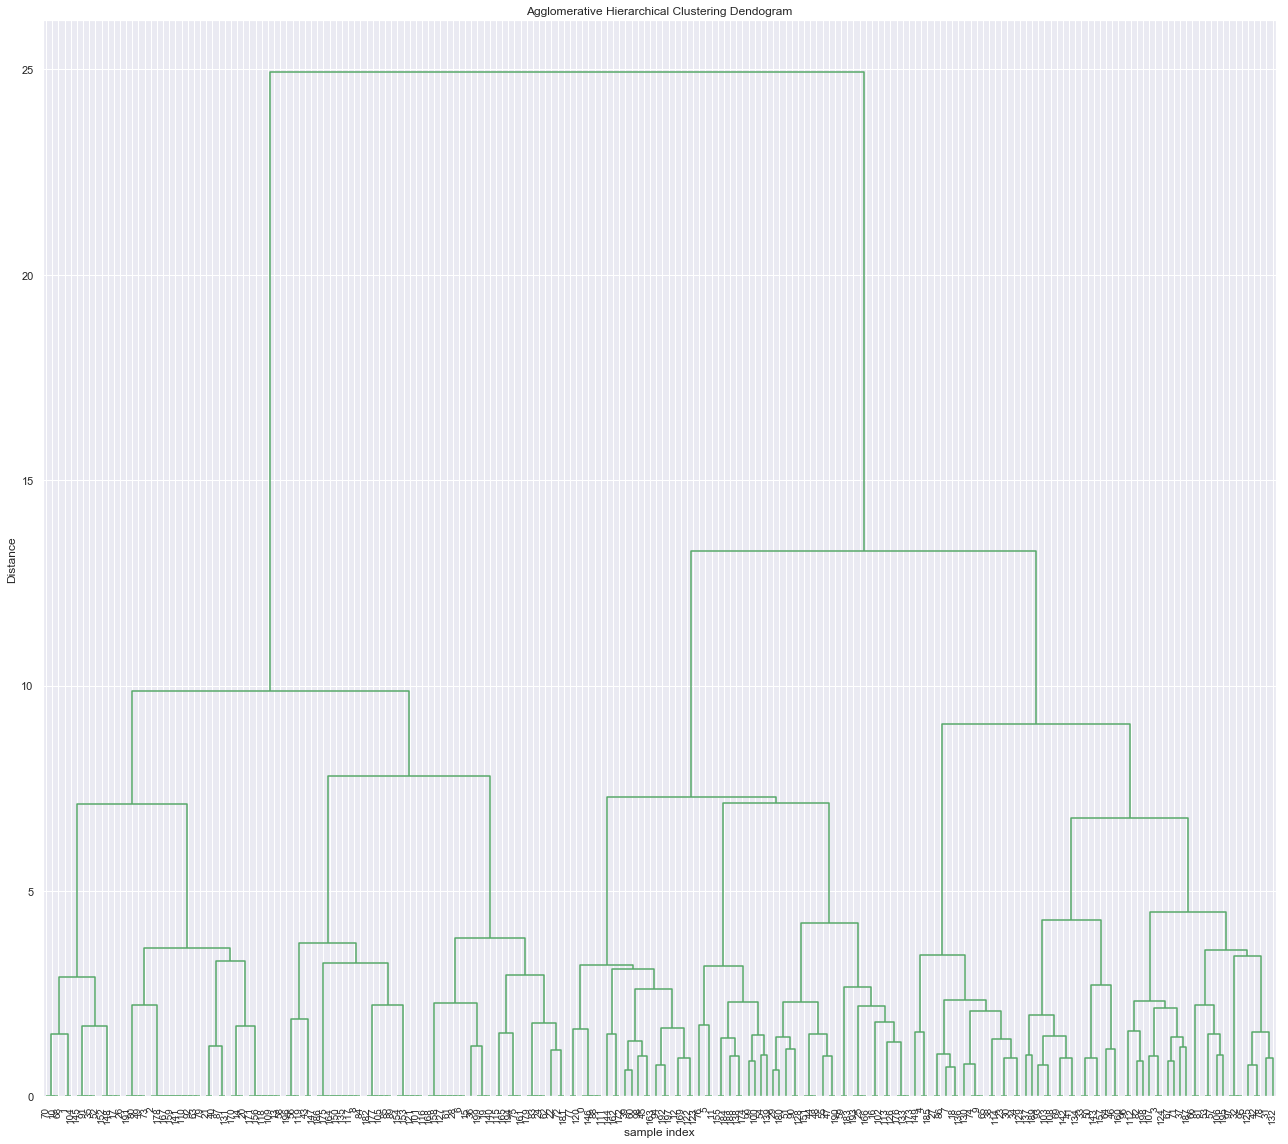

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_train_5D, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=30,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

##### 2 clusters seems ideal

### Retrain the model with 2 cluster based on above analysis

In [43]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X_train_5D)
# Getting the cluster labels
labels = kmeans.predict(X_train_5D)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 1.10014399  0.12163741  0.03264765 -0.04971954  0.00203779]
 [-1.40018325 -0.15481125 -0.04155156  0.06327941 -0.00259355]]


## 10. Create a new column in the train data and populate it with the cluster labels.

In [44]:
X_train_5D['Labels']=labels # assign lables to column

In [45]:
X_train_5D.head() # check assignment

,pc1,pc2,pc3,pc4,pc5,Labels
0,2.160365,-1.133525,-0.109640,0.247571,-0.504902,0
1,-0.974158,-1.589612,0.326338,0.108996,0.363838,1
2,-2.023648,0.597552,0.207838,0.072291,0.073722,1
3,1.675822,0.373944,-1.158508,0.765339,-0.847753,0
4,1.254400,1.311179,1.176985,-0.811707,0.146060,0


In [46]:
X_train_5D.Labels.unique() # check label values

array([0, 1], dtype=int64)

C:\Users\veeresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\veeresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


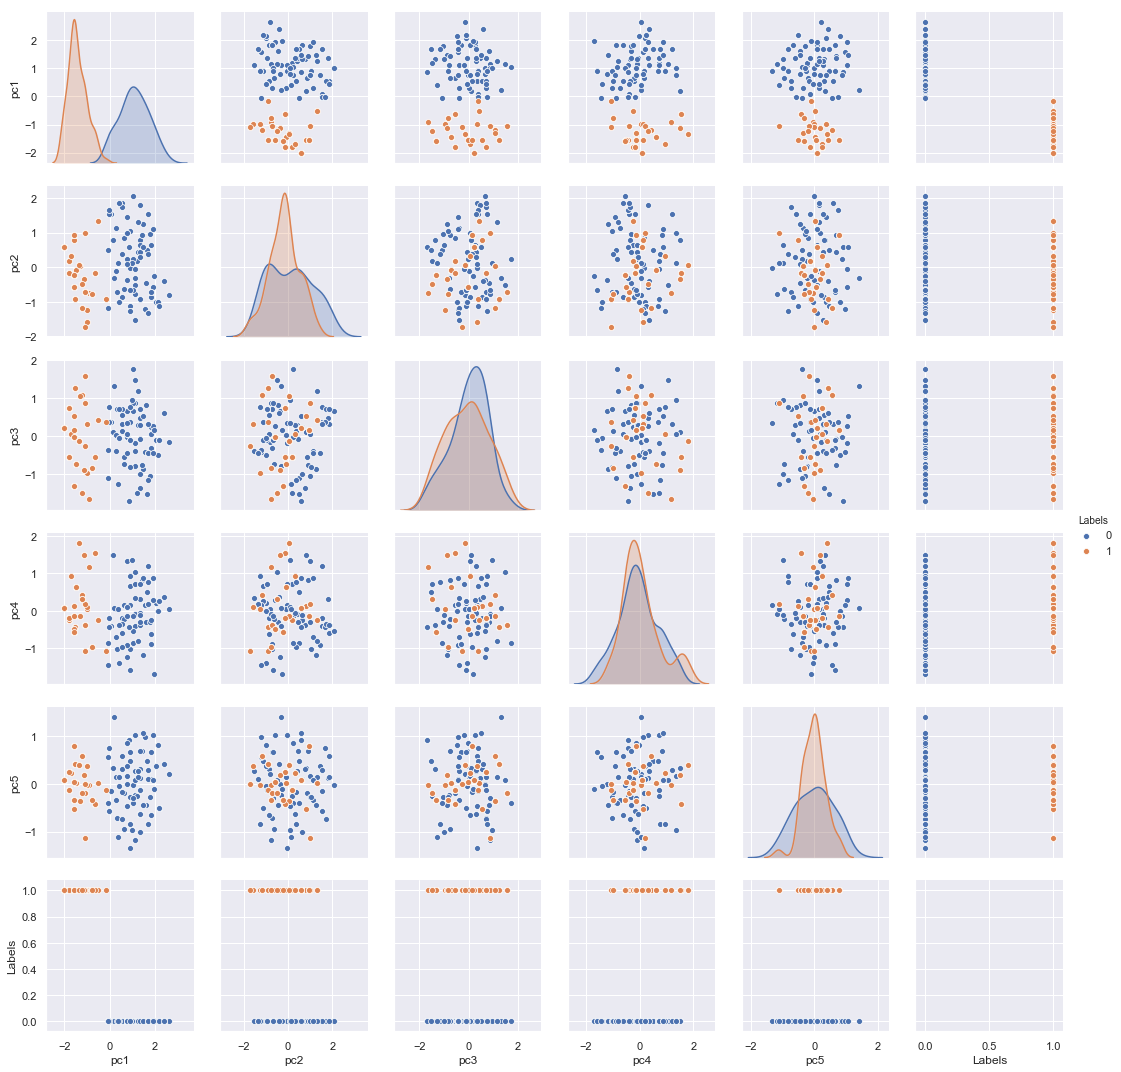

In [47]:
sns.pairplot(data=X_train_5D,diag_kind='kde',hue='Labels') # distribution of labels on different features

##### Clear label differentiation seen on first components which explains max variance

## 11. Transform the test data using the same PCA object that was fit on the train data.

In [48]:
X_tf_test=pca.transform(X_test) # transform test set
X_tf_test[0:5] # check for transformation

array([[-1.57385748, -0.2240461 , -1.321408  , -0.56225011, -0.34312073],
       [-0.02852395,  1.52807779,  0.75775811, -0.18406584, -0.57726302],
       [ 0.54689827,  0.23722083,  0.5117155 , -0.71054251, -1.49619801],
       [-0.757132  , -0.77252416, -0.85250443, -0.98067359, -0.33671597],
       [-1.57385748, -0.2240461 , -1.321408  , -0.56225011, -0.34312073]])

In [49]:
X_test_5D=pd.DataFrame(X_tf_test,columns=['pc1','pc2','pc3','pc4','pc5']) # conver to dataframe with labels

In [50]:
X_test_5D.head() # check for assignment

,pc1,pc2,pc3,pc4,pc5
0,-1.573857,-0.224046,-1.321408,-0.562250,-0.343121
1,-0.028524,1.528078,0.757758,-0.184066,-0.577263
2,0.546898,0.237221,0.511715,-0.710543,-1.496198
3,-0.757132,-0.772524,-0.852504,-0.980674,-0.336716
4,-1.573857,-0.224046,-1.321408,-0.562250,-0.343121


## 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature.

In [51]:
# predict the cluster labels for test set
labels = kmeans.predict(X_test_5D)

In [52]:
X_test_5D['Labels']=labels # assigns  labels to a column in data frame

In [53]:
X_test_5D.head() #check for assignment

,pc1,pc2,pc3,pc4,pc5,Labels
0,-1.573857,-0.224046,-1.321408,-0.562250,-0.343121,1
1,-0.028524,1.528078,0.757758,-0.184066,-0.577263,0
2,0.546898,0.237221,0.511715,-0.710543,-1.496198,0
3,-0.757132,-0.772524,-0.852504,-0.980674,-0.336716,1
4,-1.573857,-0.224046,-1.321408,-0.562250,-0.343121,1


In [54]:
X_test_5D.Labels.unique() #check for unique values

array([1, 0], dtype=int64)

C:\Users\veeresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\veeresh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


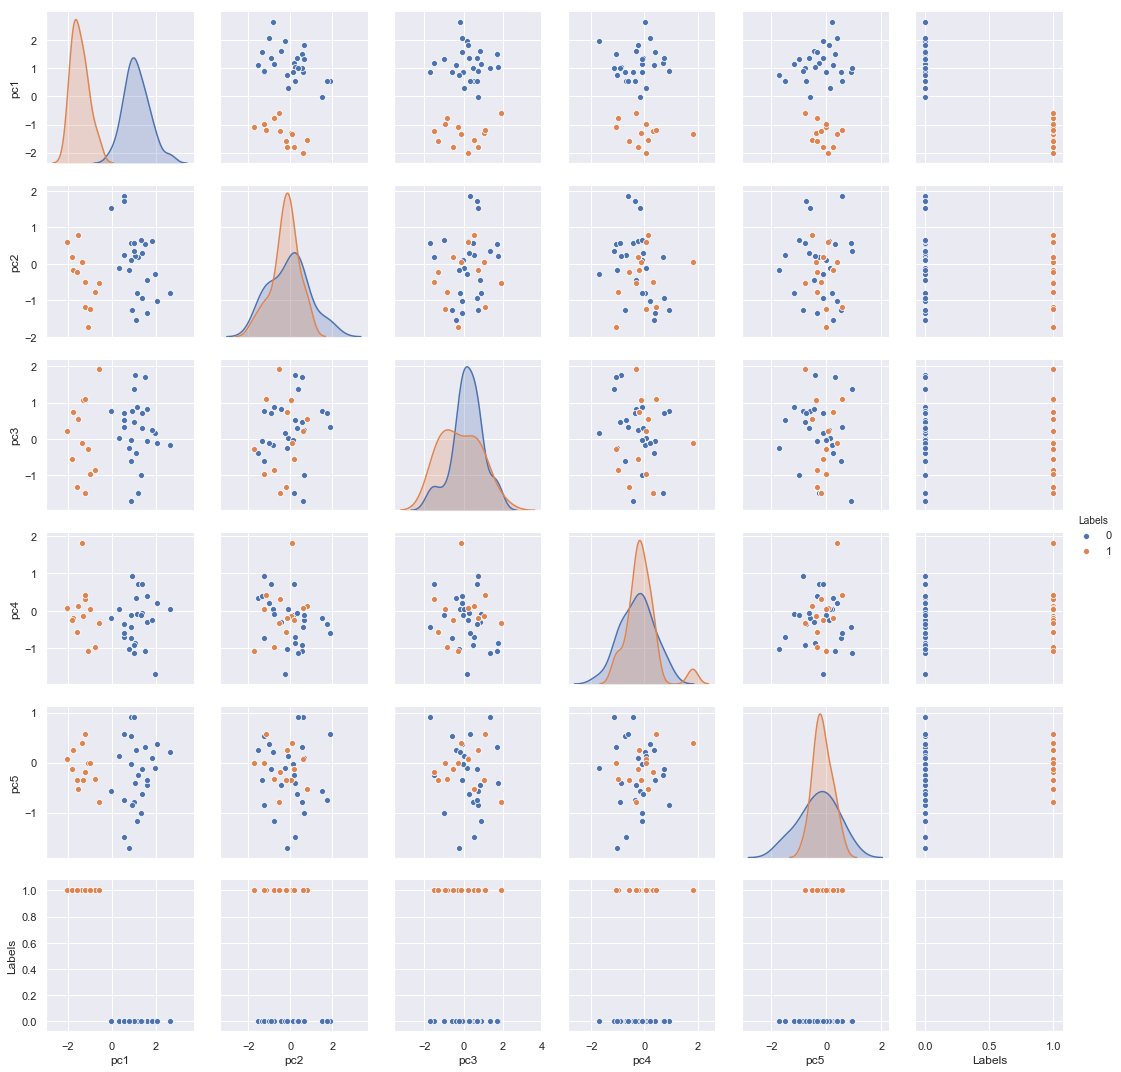

In [55]:
sns.pairplot(data=X_test_5D,diag_kind='kde',hue='Labels') # check distribution of test labels on feature space

## 13. Apply SVC model on train dataset and predict target for test dataset.

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [57]:
scaler=MinMaxScaler()  #initialize scaler

In [58]:
X_train_scaled=scaler.fit_transform(X_train) # fit and transform train data using standard scaler

C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [59]:
X_test_scaled=scaler.transform(X_test) # transform test data using standard scaler

In [60]:
svc=SVC() # initialize SV classifier

In [61]:
svc.fit(X_train_scaled,y_train) # fit the model

C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
y_test_predict=svc.predict(X_test_scaled) # predict test data

## 14. Check accuracy and confusion matrix.

In [63]:
print ('Train accuracy score :',accuracy_score(y_train,svc.predict(X_train_scaled))) # accuracy of train data

Train accuracy score : 0.995


Text(0.5, 1.0, 'Confusion matrix of Train data')

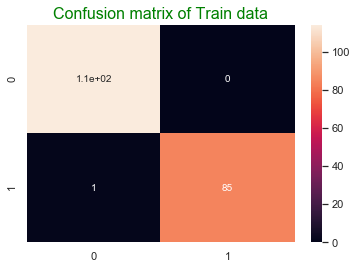

In [64]:
# np.set_printoptions(precision=2)
sns.heatmap(confusion_matrix(y_train,svc.predict(X_train_scaled)),annot=True)
plt.title('Confusion matrix of Train data',fontsize=16,color='green')

In [65]:
print ('Test accuracy score :',accuracy_score(y_test,y_test_predict))

Test accuracy score : 1.0


Text(0.5, 1.0, 'Confusion matrix of Test data')

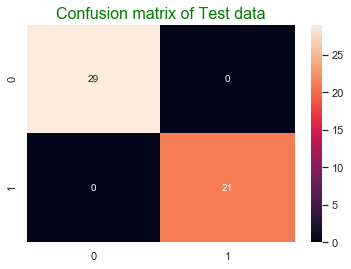

In [66]:
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True)
plt.title('Confusion matrix of Test data',fontsize=16,color='green')